In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('D:\\COURSES\\Python for Machine Learning & Data Science Masterclass\\1 - Introduction to Course\\08-Linear-Regression-Models\\Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X=df.drop('sales',axis=1)
y=df['sales']

In [5]:
from sklearn.preprocessing import PolynomialFeatures


In [6]:
poly_converter=PolynomialFeatures(degree=2,include_bias=False)

In [7]:
poly_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [9]:
poly_features=poly_converter.transform(X)

In [45]:
poly_features.shape

(200, 9)

In [11]:
X.shape

(200, 3)

In [12]:
#Transformed into A B C AB BC AC A**2 B**2 C**2

In [13]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
model=LinearRegression()

In [35]:
model.fit(X_train,y_train)

LinearRegression()

In [93]:
predictions=model.predict(X_test)
# predictions

In [37]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [38]:
#MAE
mean_absolute_error(y_test,predictions)

0.48967980448037096

In [39]:
#MSE
mean_squared_error(y_test,predictions)

0.44175055104035904

In [42]:
#RMAE
np.sqrt(mean_squared_error(y_test,predictions))

0.6646431757269152

In [43]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [46]:
#VISUALIZING OVERFITTING AND UNDERFITTING

In [51]:
train_errors=[]
test_errors=[]

for i in range(1,10):
    poly_converter=PolynomialFeatures(degree=i,include_bias=False)
    poly_features=poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    model=LinearRegression()
    model.fit(X_train,y_train)
    
    train_prediction=model.predict(X_train)
    test_prediction=model.predict(X_test)
    
#     rmse
    train_prediction=np.sqrt(mean_squared_error(y_train,train_prediction))
    test_prediction=np.sqrt(mean_squared_error(y_test,test_prediction))
    train_errors.append(train_prediction)
    test_errors.append(test_prediction)

In [54]:
train_errors
# note the sudden spike at higher degree

[1.734594124329376,
 0.5879574085292232,
 0.4339344356902066,
 0.35170836883993467,
 0.25093429467703415,
 0.19712640340673274,
 5.421420423901486,
 0.14180399863580023,
 0.16654350003388185]

In [55]:
test_errors

[1.5161519375993877,
 0.6646431757269152,
 0.5803286825156331,
 0.5077742648623355,
 2.575831205082368,
 4.492668770849738,
 1381.4043738479102,
 4449.599764768951,
 95891.24543764142]

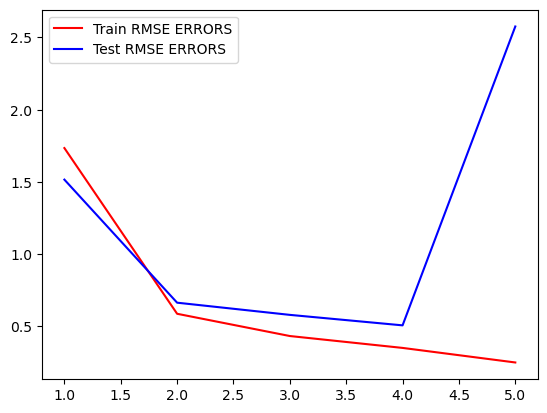

In [62]:
plt.plot(range(1,6),train_errors[:5],label="Train RMSE ERRORS",c='r')
plt.plot(range(1,6),test_errors[:5],label="Test RMSE ERRORS",c='b')
plt.legend()

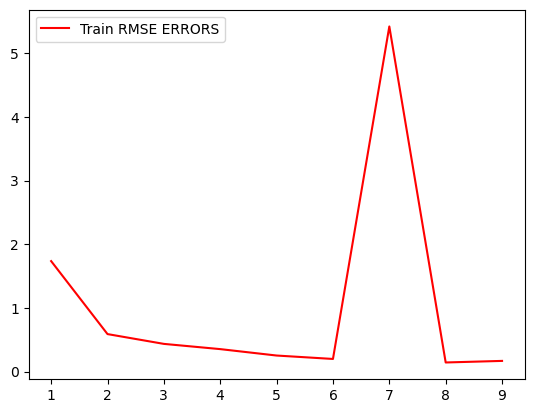

In [71]:
plt.plot(range(1,10),train_errors,label="Train RMSE ERRORS",c='r')
plt.plot(range(1,10),test_errors,label="Test RMSE ERRORS",c='b')
plt.legend()

In [74]:
final_poly_coverter=PolynomialFeatures(degree=3,include_bias=False)
final_poly_features=final_poly_coverter.fit_transform(X)

In [75]:
final_poly_model=LinearRegression()

In [77]:
final_poly_model.fit(final_poly_features,y)

LinearRegression()

In [78]:
from joblib import dump,load


In [83]:
dump(final_poly_coverter,"Final_Poly_converter.joblib")

['Final_Poly_converter.joblib']

In [79]:
dump(final_poly_model,"Final_Poly_model.joblib")

['Final_Poly_model.joblib']

In [80]:
loaded_model=load("Final_Poly_model.joblib")

In [81]:
loaded_model

LinearRegression()

In [85]:
dummy_data=[[149,22,12]]

In [84]:
loaded_converter=load("Final_Poly_converter.joblib")

In [90]:
dummy_converted_features=loaded_converter.fit_transform(dummy_data)


In [91]:
loaded_model.predict(dummy_converted_features)

array([14.64501014])